In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mouse_data = pd.read_csv('mouse_drug_data.csv')
clinic_trial = pd.read_csv('clinicaltrial_data.csv')

In [3]:
mouse_data.head(5)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
clinic_trial.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [48]:
trial_all_data = pd.merge(mouse_data, clinic_trial, how = 'outer', on = 'Mouse ID') 
trial_all_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [6]:
tumor_size_pivot = pd.pivot_table(trial_all_data, values = 'Tumor Volume (mm3)', index = 'Timepoint', 
                                      columns = 'Drug')
tumor_size_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
metastatic_pivot = pd.pivot_table(trial_all_data, values = 'Metastatic Sites', index = 'Timepoint', 
                                      columns = 'Drug')
metastatic_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [8]:
mouse_count_pivot = pd.pivot_table(trial_all_data, values = 'Mouse ID', index = 'Timepoint', 
                                      columns = 'Drug', aggfunc = 'count')
mouse_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [45]:
tumor_change = trial_all_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
tumor_change.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


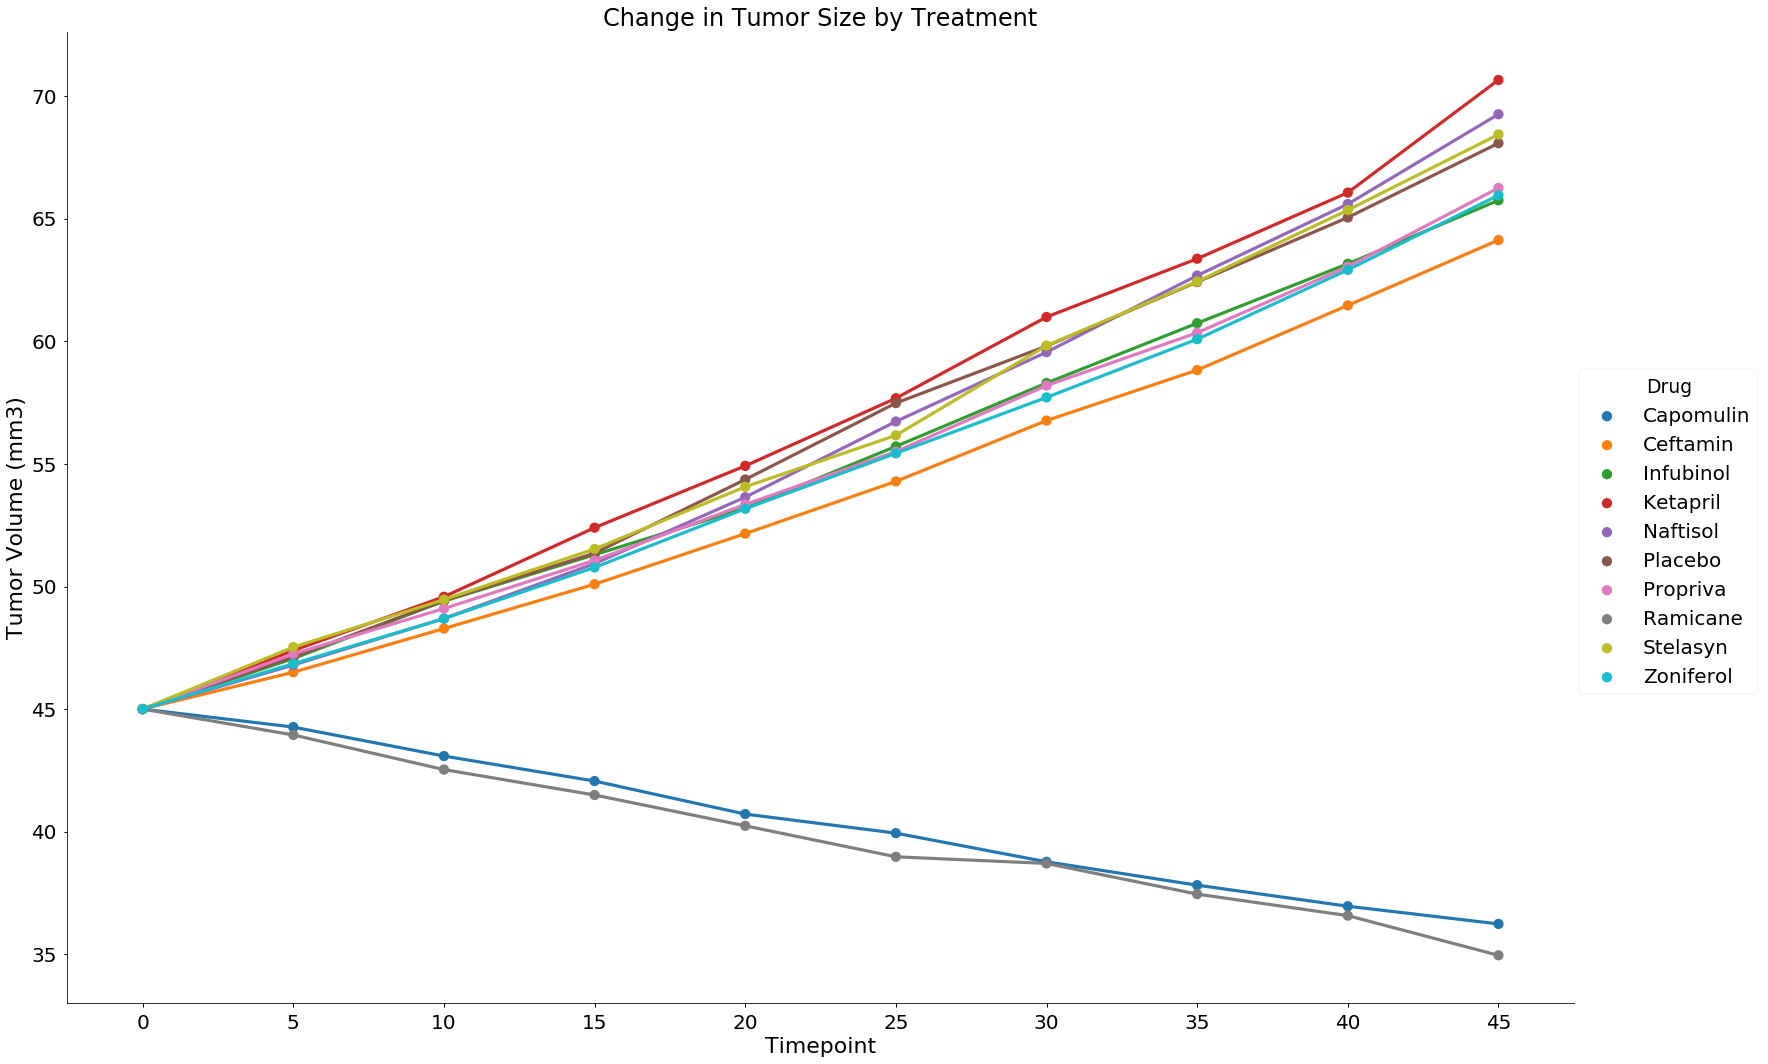

In [44]:
sns.set_context('notebook', font_scale = 2)
tumor_change_plot = sns.factorplot('Timepoint', 'Tumor Volume (mm3)', hue = 'Drug' , data = tumor_change, 
                                   ci = 'sd', kind = 'point', size = 15, aspect = 1.5)
plt.title('Change in Tumor Size by Treatment')
tumor_change_plot
plt.show()

In [46]:
metastatic_sites = trial_all_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()
metastatic_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


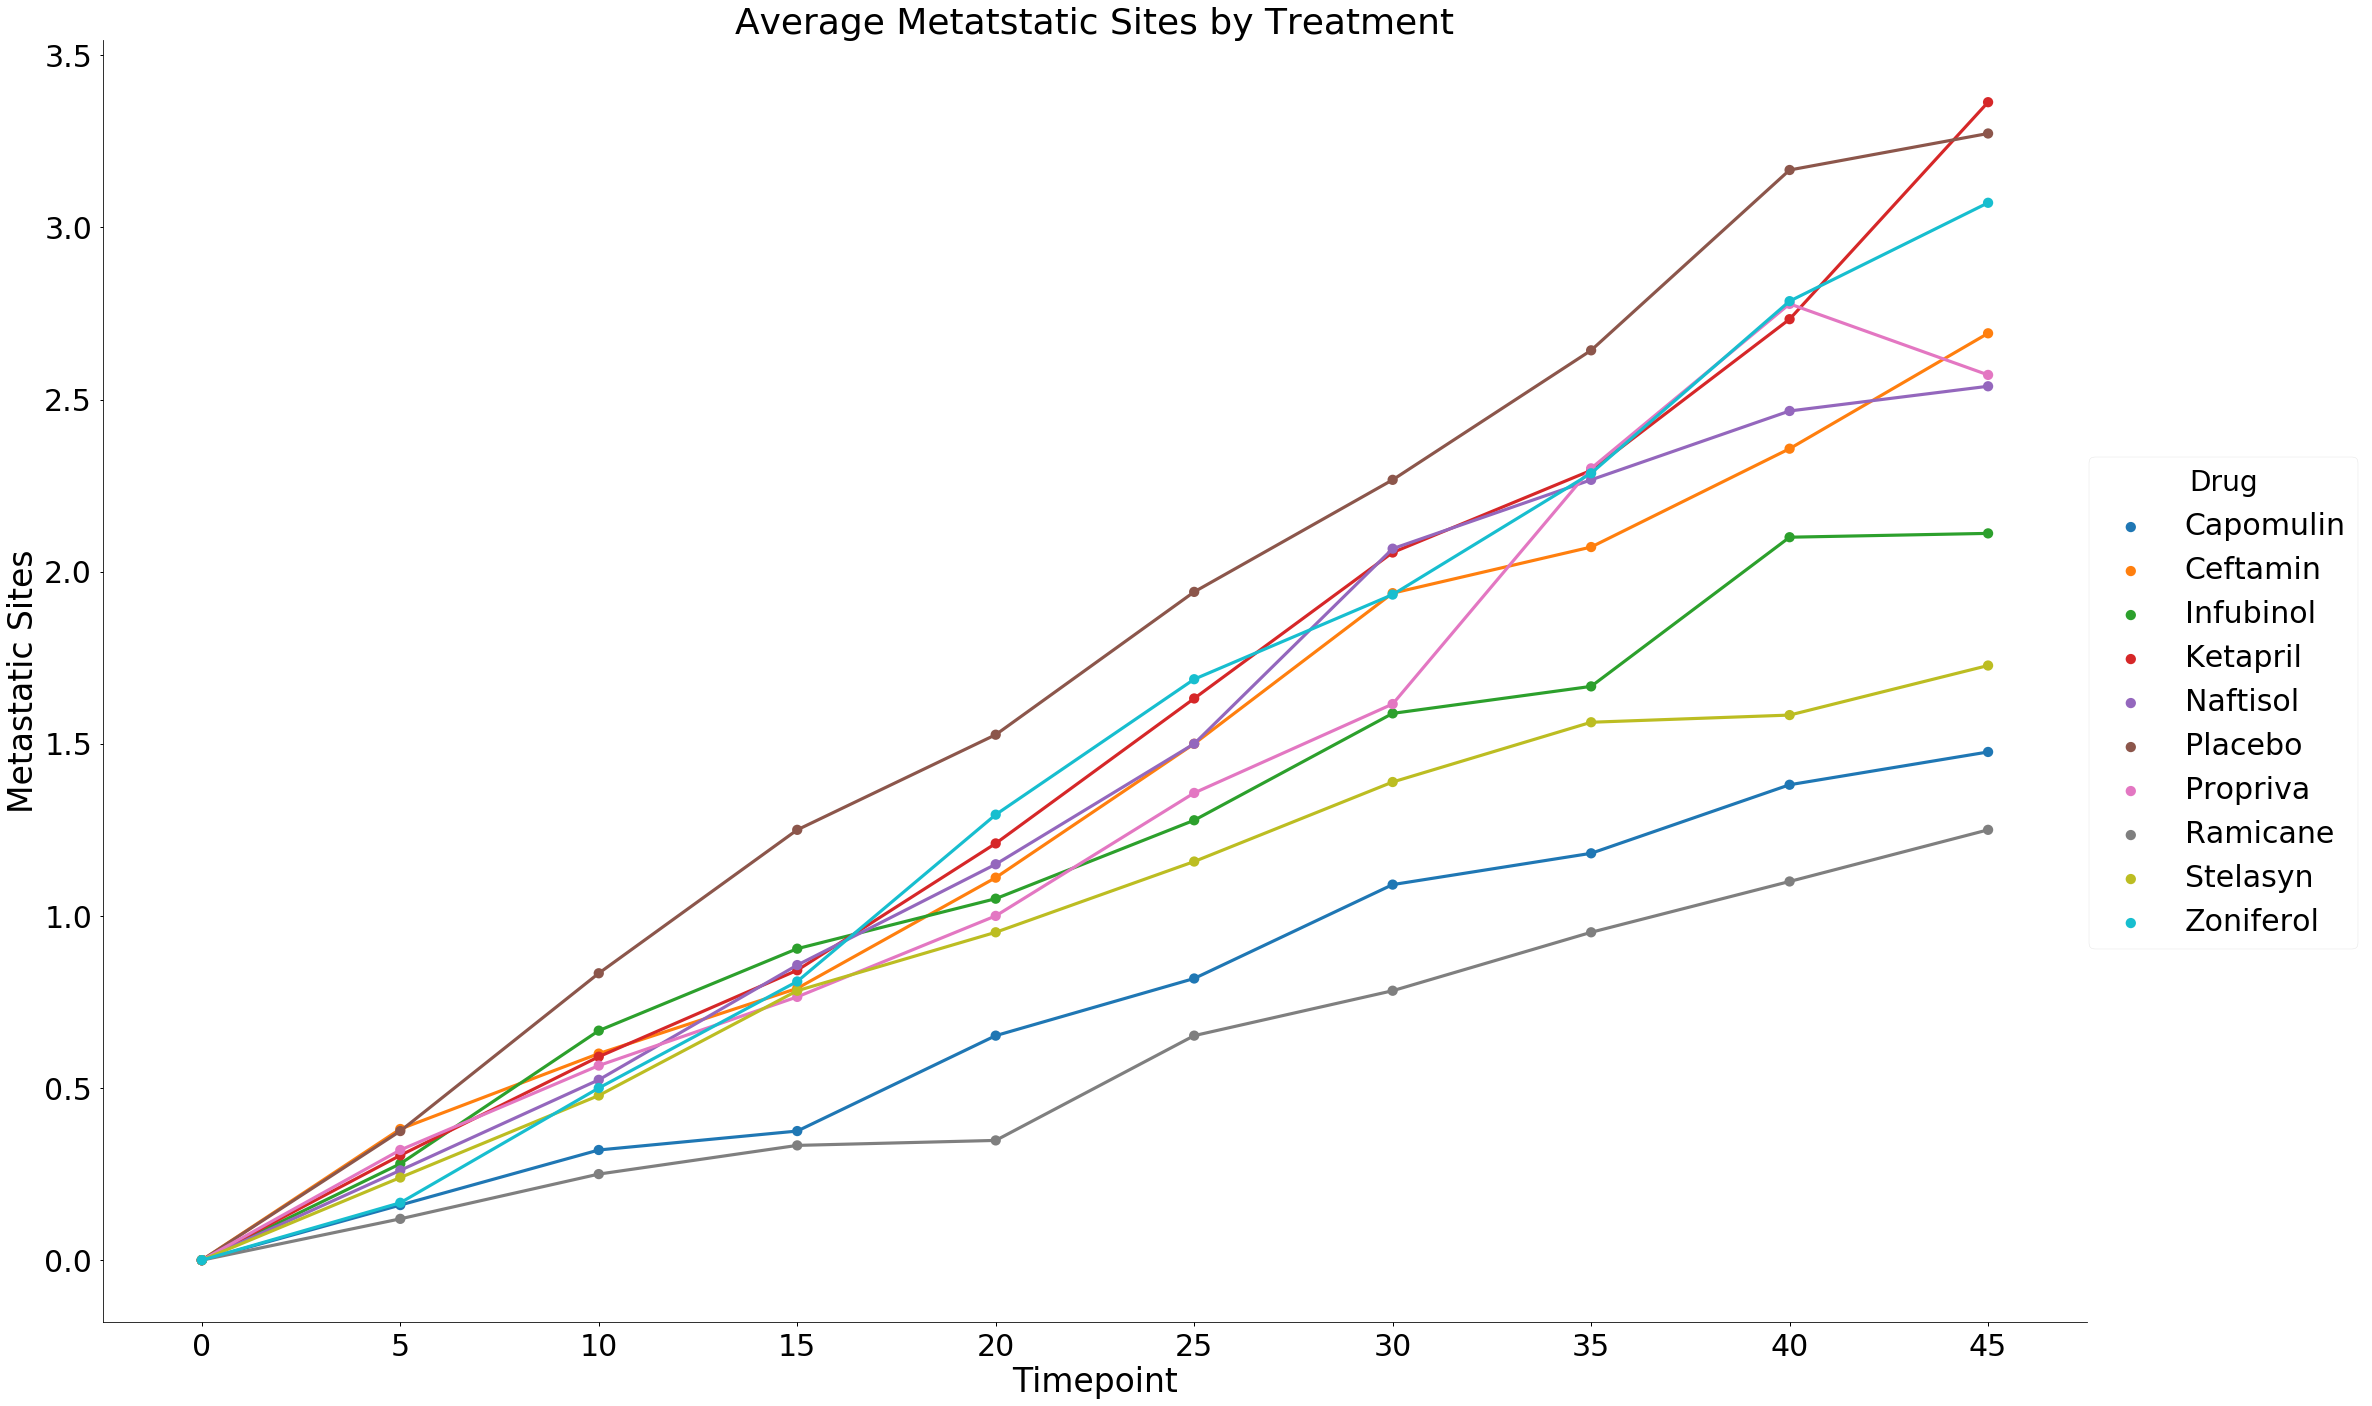

In [38]:
sns.set_context('notebook', font_scale = 3)
metastatic_plot = sns.factorplot('Timepoint', 'Metastatic Sites', hue = 'Drug', data = metastatic_sites, size = 20, 
                                 aspect = 1.5)
plt.title('Average Metatstatic Sites by Treatment')
plt.show()

In [47]:
mouse_count = trial_all_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count().reset_index()
mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


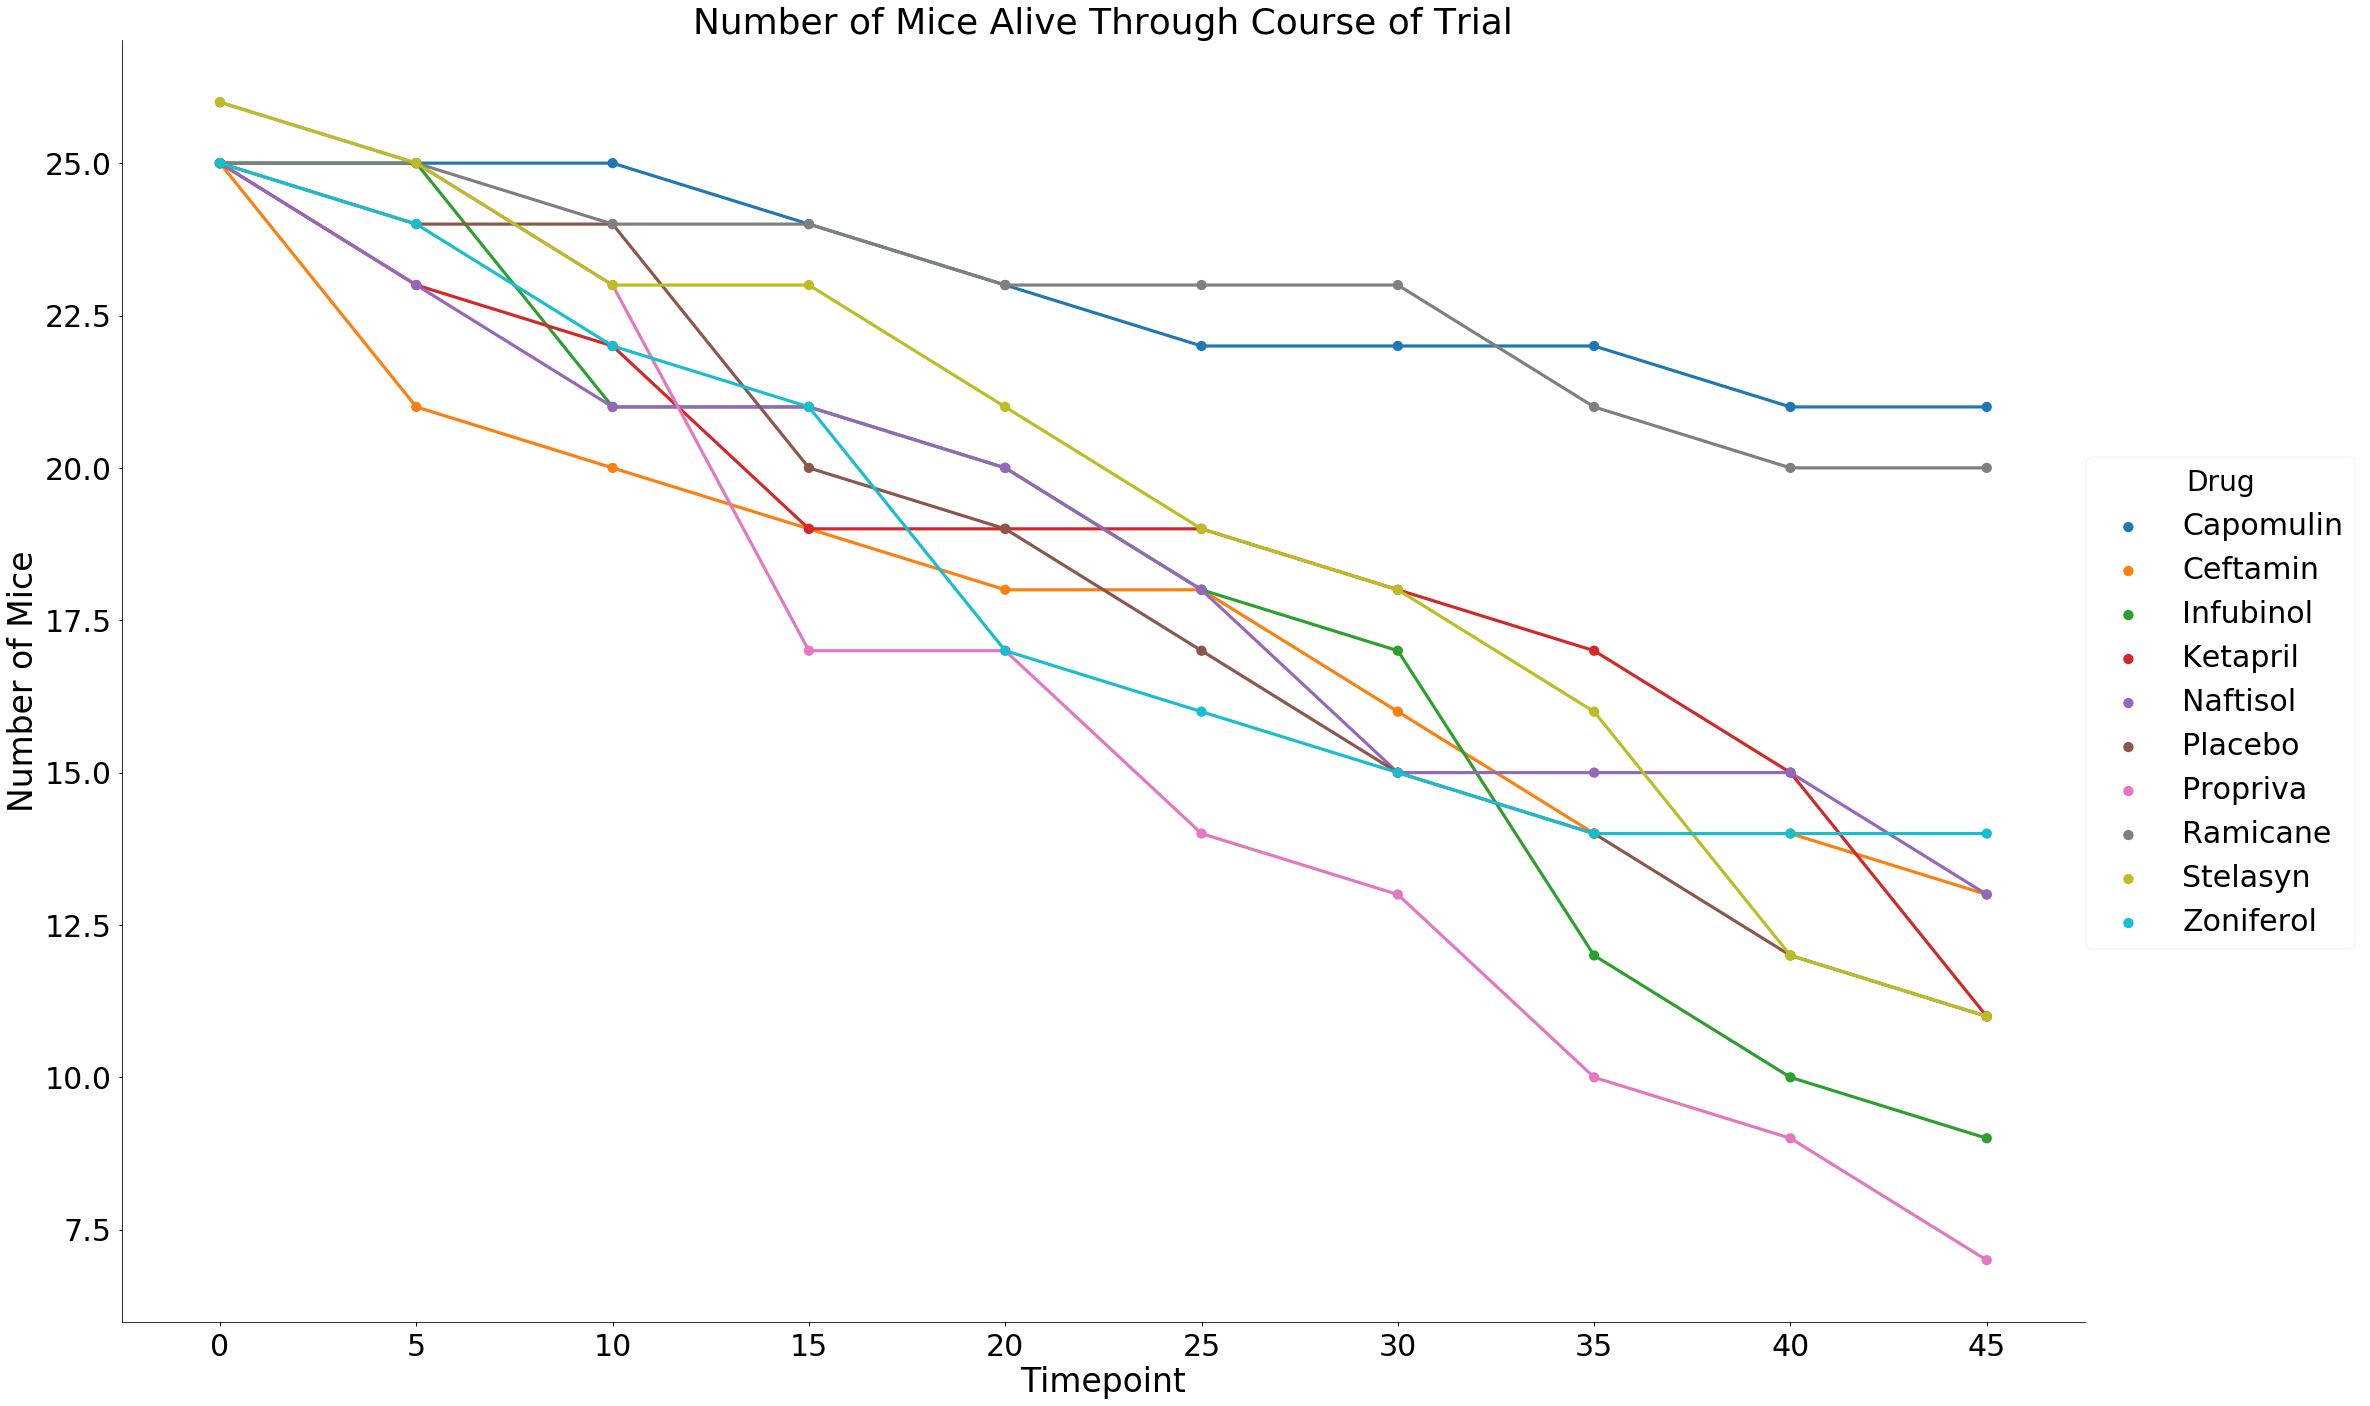

In [33]:
sns.set_context('notebook', font_scale = 3)
mouse_plot = sns.factorplot('Timepoint', 'Mouse ID', hue = 'Drug', data = mouse_count, size = 20, 
                                 aspect = 1.5)
plt.ylabel('Number of Mice')
plt.title('Number of Mice Alive Through Course of Trial')
plt.show()

In [15]:
start_volume = tumor_change.loc[tumor_change['Timepoint'].values == 0]
start_volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.0
10,Ceftamin,0,45.0
20,Infubinol,0,45.0
30,Ketapril,0,45.0
40,Naftisol,0,45.0
50,Placebo,0,45.0
60,Propriva,0,45.0
70,Ramicane,0,45.0
80,Stelasyn,0,45.0
90,Zoniferol,0,45.0


In [16]:
end_volume = tumor_change.loc[tumor_change['Timepoint'].values == 45]
end_volume

,Drug,Timepoint,Tumor Volume (mm3)
9,Capomulin,45,36.236114
19,Ceftamin,45,64.132421
29,Infubinol,45,65.755562
39,Ketapril,45,70.662958
49,Naftisol,45,69.265506
59,Placebo,45,68.084082
69,Propriva,45,66.258529
79,Ramicane,45,34.955595
89,Stelasyn,45,68.438310
99,Zoniferol,45,65.960888


In [17]:
volume_change_data = start_volume.merge(end_volume, on = 'Drug', how = 'outer')
volume_change_data = volume_change_data.rename(columns = {'Timepoint_x' : 'Starting Timepoint', 'Tumor Volume (mm3)_x' : 
                            'Starting Volume', 'Timepoint_y' : 'Ending Timepoint' , 'Tumor Volume (mm3)_y' : 
                            'Ending Volume'})
volume_change_data

,Drug,Starting Timepoint,Starting Volume,Ending Timepoint,Ending Volume
0,Capomulin,0,45.0,45,36.236114
1,Ceftamin,0,45.0,45,64.132421
2,Infubinol,0,45.0,45,65.755562
3,Ketapril,0,45.0,45,70.662958
4,Naftisol,0,45.0,45,69.265506
5,Placebo,0,45.0,45,68.084082
6,Propriva,0,45.0,45,66.258529
7,Ramicane,0,45.0,45,34.955595
8,Stelasyn,0,45.0,45,68.438310
9,Zoniferol,0,45.0,45,65.960888


In [18]:
percent_vol_change = ((volume_change_data['Ending Volume'] - volume_change_data['Starting Volume'])
                      /volume_change_data['Starting Volume'])*100
percent_vol_change

0   -19.475303
1    42.516492
2    46.123472
3    57.028795
4    53.923347
5    51.297960
6    47.241175
7   -22.320900
8    52.085134
9    46.579751
dtype: float64

In [19]:
final_volume_change = pd.concat([volume_change_data, percent_vol_change], axis = 1)
final_volume_change = final_volume_change.rename(columns = {0:'Percent Change in Volume'})
final_volume_change

,Drug,Starting Timepoint,Starting Volume,Ending Timepoint,Ending Volume,Percent Change in Volume
0,Capomulin,0,45.0,45,36.236114,-19.475303
1,Ceftamin,0,45.0,45,64.132421,42.516492
2,Infubinol,0,45.0,45,65.755562,46.123472
3,Ketapril,0,45.0,45,70.662958,57.028795
4,Naftisol,0,45.0,45,69.265506,53.923347
5,Placebo,0,45.0,45,68.084082,51.297960
6,Propriva,0,45.0,45,66.258529,47.241175
7,Ramicane,0,45.0,45,34.955595,-22.320900
8,Stelasyn,0,45.0,45,68.438310,52.085134
9,Zoniferol,0,45.0,45,65.960888,46.579751


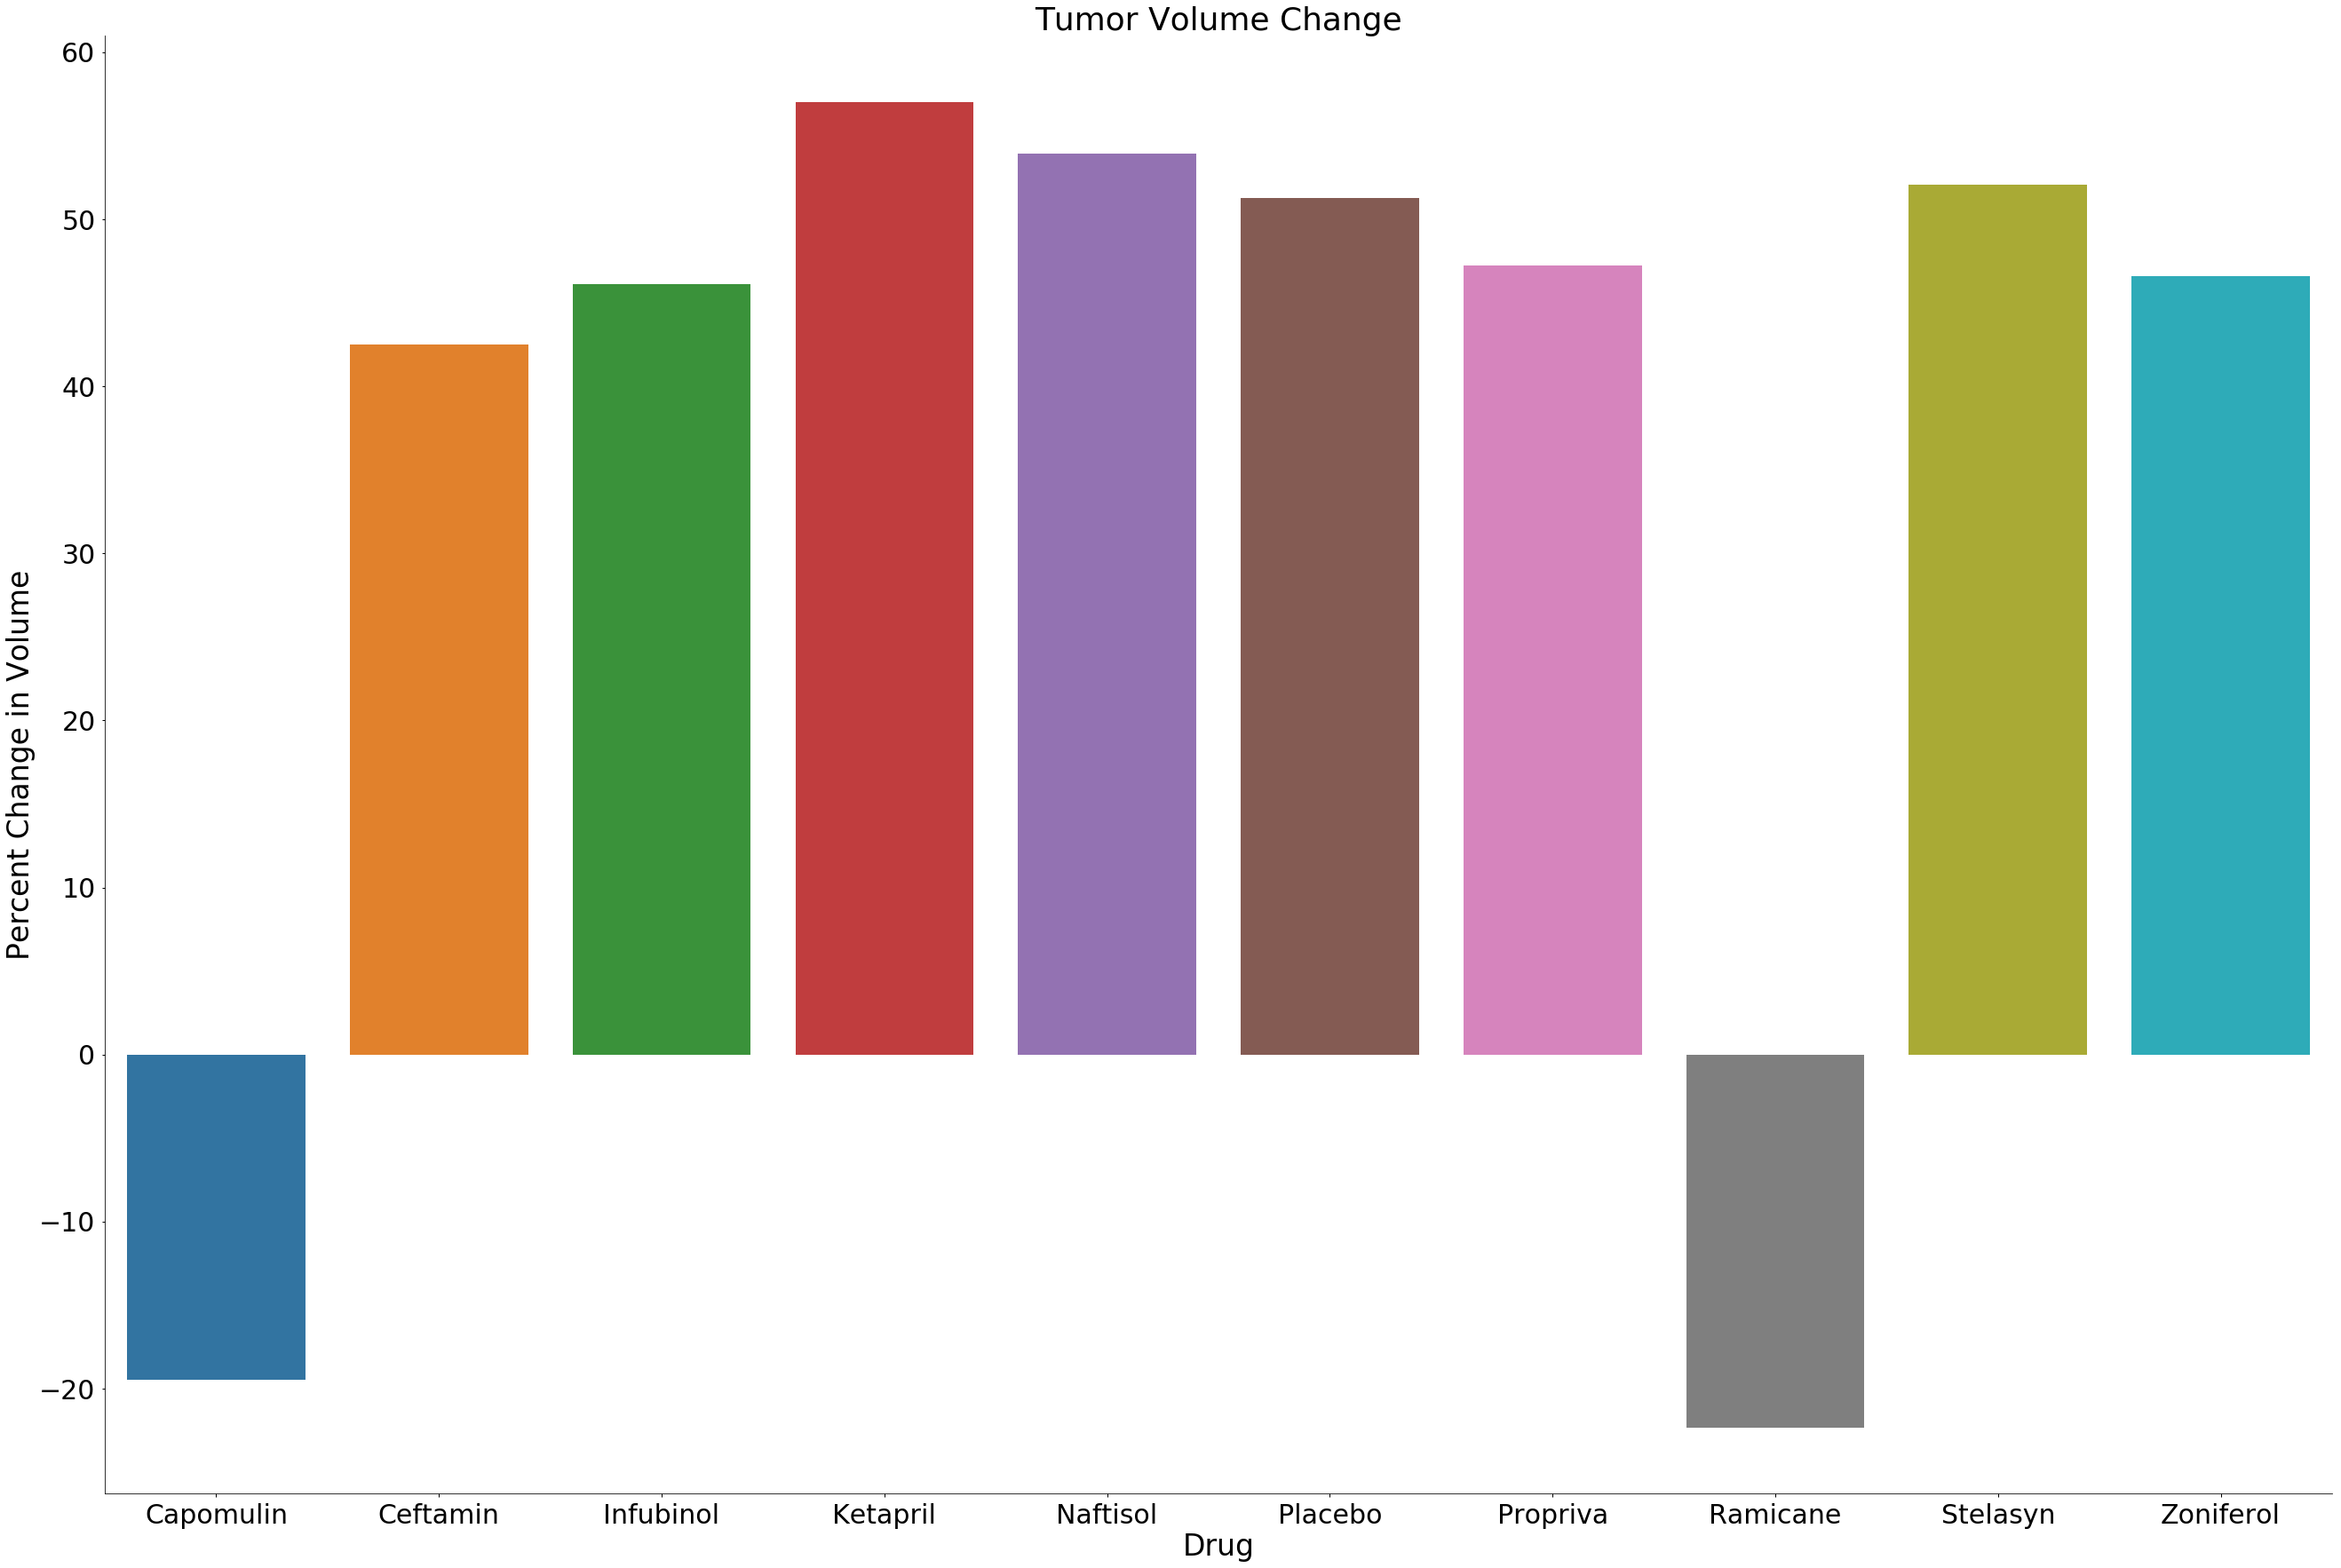

In [30]:
sns.set_context('notebook', font_scale = 3)
sns.factorplot('Drug', 'Percent Change in Volume', data = final_volume_change, kind = 'bar', size = 25, aspect = 1.5)
plt.title('Tumor Volume Change')
plt.show()